# The Multilayer Perceptron

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs
import pandas as pd
from sklearn.metrics import accuracy_score
sbs.set_context('notebook')

In [2]:
pip install tensorflow

  Using cached tensorflow-2.4.1-cp38-cp38-win_amd64.whl (370.7 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
Processing c:\users\tiziano\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501\termcolor-1.1.0-py3-none-any.whl
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached tensorflow_estimator-2.4.0-py2.py3-none-any.whl (462 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached absl_py-0.12.0-py3-none-any.whl (129 kB)
Processing c:\users\tiziano\appdata\local\pip\cache\wheels\5f\fd\9e\b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73\wrapt-1.12.1-py3-none-any.whl
  Using cached tensorboard-2.5.0-py3-none-any.whl (6.0 MB)
  Using cached tensorboard_data_server-0.6.0-py3-none-any.whl (2.3 kB)
  Using cached tensorboard_plugin_wit-1.8.0-py3-none-any.whl (781 kB)
 

### Multilayer perceptron to the rescue!
- Data that is distributed non-linearly (e.g. XOR) cannot be learned by perceptron
- At least not without tedious feature engineering

**Stacking several perceptrons increases expressive power!**

- learning intermediate/partial representations at intermediate layers

**Let's see how it works in `keras`**


In [3]:
def gaussian_data(num, epsilon=1):
    '''
    generates a data set from two overlapping Gaussian point clouds
    '''
    x1_p1 = np.random.normal(1 + epsilon, size=num//2)
    x2_p1 = np.random.normal(1, size=num//2)

    x1_p2 = np.random.normal(-(1 + epsilon), size=num//2)
    x2_p2 = np.random.normal(-(1 + epsilon), size=num//2)

    x1 = np.concatenate([x1_p1, x1_p2])
    x2 = np.concatenate([x2_p1, x2_p2])

    labels = np.zeros((num, 2))
    labels[:num//2, 0] = 1
    labels[num//2:, 1] = 1
    return x1, x2, labels

def XOR_sample(sample_size, ratio=0.5, x1_p1_mean=25, x1_p2_mean=50, x2_p1_mean=5, x2_p2_mean=2, epsilon = 0.1):
    size1 = int(sample_size * ratio)
    size2 = sample_size - size1
    
    x1 = np.random.normal(loc=x1_p1_mean, size=size1//2)
    x1 = np.hstack((x1, np.random.normal(loc=-x1_p1_mean, size=size1//2)))   
    x1 = np.hstack((x1, np.random.normal(loc=x1_p2_mean, size=size2//2)))
    x1 = np.hstack((x1, np.random.normal(loc=-x1_p2_mean, size=size2//2)))
    
    x2 = np.random.normal(loc=x2_p1_mean, size=size1//2)
    x2 = np.hstack((x2, np.random.normal(loc=-x2_p1_mean, size=size1//2)))
    x2 = np.hstack((x2, np.random.normal(loc=x2_p2_mean, size=size2//2)))
    x2 = np.hstack((x2, np.random.normal(loc=-x2_p2_mean, size=size2//2)))
    
    labels = np.zeros((sample_size, 2))
    labels[:sample_size//2, 0] = 1
    labels[sample_size//2:, 1] = 1

    return x1, x2, labels


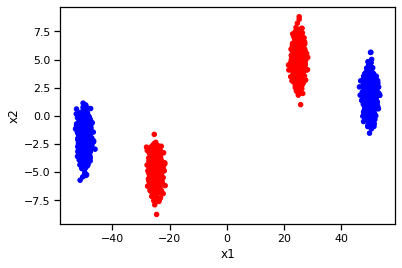

In [4]:
# let's get some data
num_samples = 5000
half = num_samples//2
a,b,y = XOR_sample(num_samples)

X = np.vstack((a,b)).T

pd.DataFrame({'x1': a, 'x2': b}).plot.scatter(x='x1', y='x2', c=['red']*half + ['blue']*half);

In [5]:
from keras.models import Model
from keras.layers import Input, Dense

# input: a sequence  of 2 integers
main_input = Input(shape=(2,), name='main_input')

# add the output layer
output = Dense(2, activation='hard_sigmoid', name='output', kernel_initializer='glorot_uniform')(main_input)

# f(X) = sigmoid(X*W + b)

# the model is specified by connecting input and output
perceptron_keras = Model(inputs=[main_input], outputs=[output])

In [6]:
perceptron_keras.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      [(None, 2)]               0         
_________________________________________________________________
output (Dense)               (None, 2)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [7]:
from sklearn.metrics import f1_score
perceptron_keras.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = perceptron_keras.fit(X, y,
                    epochs=15,
                    verbose=1,
                    validation_split=0.2
                )

# loss, accuracy = perceptron_keras.evaluate(X, y,
#                                            batch_size=20, 
#                                            verbose=1)
# print('Test loss:', loss)
# print('Test accuracy:', accuracy)

Epoch 1/15
125/125 [==============================] - 4s 23ms/step - loss: 5.6739 - accuracy: 0.6301 - val_loss: 15.3371 - val_accuracy: 0.0000e+00
Epoch 2/15
125/125 [==============================] - 0s 2ms/step - loss: 5.8315 - accuracy: 0.6198 - val_loss: 15.3371 - val_accuracy: 0.0000e+00
Epoch 3/15
125/125 [==============================] - 0s 3ms/step - loss: 5.5190 - accuracy: 0.6402 - val_loss: 15.3371 - val_accuracy: 0.0000e+00
Epoch 4/15
125/125 [==============================] - 0s 4ms/step - loss: 5.6506 - accuracy: 0.6316 - val_loss: 15.3371 - val_accuracy: 0.0000e+00
Epoch 5/15
125/125 [==============================] - 0s 4ms/step - loss: 5.3852 - accuracy: 0.6489 - val_loss: 15.3371 - val_accuracy: 0.0000e+00
Epoch 6/15
125/125 [==============================] - 0s 3ms/step - loss: 5.9952 - accuracy: 0.6091 - val_loss: 15.3371 - val_accuracy: 0.0000e+00
Epoch 7/15
125/125 [==============================] - 0s 1ms/step - loss: 5.8388 - accuracy: 0.6193 - val_loss: 15.33

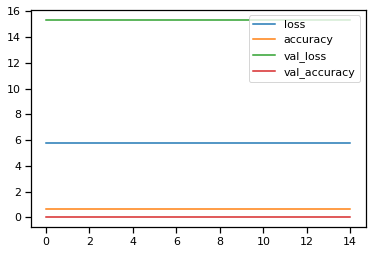

In [8]:
pd.DataFrame(history.history).plot.line()

In [9]:
predictions = perceptron_keras.predict(X).argmax(axis=1)
accuracy_score(y.argmax(axis=1), predictions)

0.5

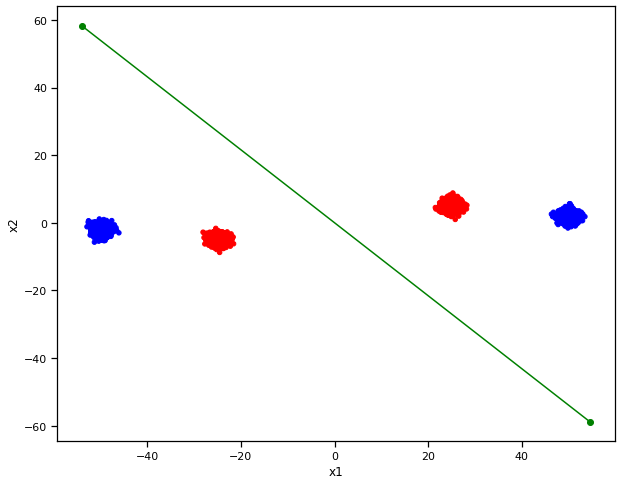

In [10]:
def get_y(x, w1, w2, bias):
    '''
    compute y value for specific x, given the weights and bias
    (helper function for decision boundary)
    '''
    return ((-(x * w1) - bias) / w2)
    
fig, ax = plt.subplots(figsize=(10,8))
pd.DataFrame({'x1': a, 'x2': b}).plot.scatter(x='x1', y='x2', c=['red']*2500 + ['blue']*2500, ax=ax);

(w1, w2), bias = perceptron_keras.get_weights()
xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1

ax.plot([xmin, xmax], [get_y(xmin, w1, w2, bias)[1], get_y(xmax, w1, w2, bias)[1]], marker='o', color='green');


## MLP

In [11]:
# input: a sequence  of 2 integers
mlp_input = Input(shape=(2,), name='main_input')

# add a hidden layer
mlp_hidden = Dense(16, activation='relu', name='hidden', kernel_initializer='glorot_uniform')(mlp_input)

# add the output layer
mlp_output = Dense(2, activation='softmax', name='output', kernel_initializer='glorot_uniform')(mlp_hidden)

# the model is specified by connecting input and output
mlp = Model(inputs=[mlp_input], outputs=[mlp_output])

mlp.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      [(None, 2)]               0         
_________________________________________________________________
hidden (Dense)               (None, 16)                48        
_________________________________________________________________
output (Dense)               (None, 2)                 34        
Total params: 82
Trainable params: 82
Non-trainable params: 0
_________________________________________________________________


In [12]:
from keras import optimizers

optimizer = optimizers.Adam(lr=0.001)

mlp.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy']
           )

mlp_history = mlp.fit(X, y,
                    epochs=50,
                    verbose=1,
                    validation_split=0.2)

Epoch 1/50
125/125 [==============================] - 1s 5ms/step - loss: 3.5817 - accuracy: 0.4229 - val_loss: 1.5468 - val_accuracy: 0.0000e+00
Epoch 2/50
125/125 [==============================] - 0s 3ms/step - loss: 0.4175 - accuracy: 0.9251 - val_loss: 0.9060 - val_accuracy: 0.0120
Epoch 3/50
125/125 [==============================] - 0s 4ms/step - loss: 0.2818 - accuracy: 0.9397 - val_loss: 0.6678 - val_accuracy: 0.6120
Epoch 4/50
125/125 [==============================] - 0s 3ms/step - loss: 0.2058 - accuracy: 0.9717 - val_loss: 0.3774 - val_accuracy: 0.9700
Epoch 5/50
125/125 [==============================] - 0s 3ms/step - loss: 0.1557 - accuracy: 0.9916 - val_loss: 0.3369 - val_accuracy: 0.9600
Epoch 6/50
125/125 [==============================] - 1s 4ms/step - loss: 0.1173 - accuracy: 0.9935 - val_loss: 0.2535 - val_accuracy: 0.9770
Epoch 7/50
125/125 [==============================] - 0s 3ms/step - loss: 0.0917 - accuracy: 0.9942 - val_loss: 0.2209 - val_accuracy: 0.9780
Ep

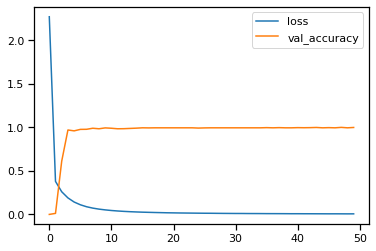

In [13]:
df_mlp_history = pd.DataFrame(mlp_history.history)

df_mlp_history['loss val_accuracy'.split()].plot();

Let's compare with the sklearn implementation:

In [14]:
from sklearn.neural_network import MLPClassifier

# try different nr of layers and layers' size
# the hidden_layer_sizes parameters takes a tuple where 
# the ith values represent the ith layer size
for tup in [(2, 2), (3, 3), (3, 3, 3)]:
    print(tup)
    # instantiate and train the MLP
    clf = MLPClassifier(hidden_layer_sizes=tup, 
                        random_state=1, 
                        max_iter=200)
    clf.fit(X, y)
    # print the predictions as probability ditributions
    print(clf.predict_proba(X[:5]))
    # print the predicted classes
    print(clf.predict(X[:5]))
    # print the model's performance
    print(clf.score(X, y))
    print()


(2, 2)


C:\Users\Tiziano\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[[0.50711298 0.49305473]
 [0.50711298 0.49305473]
 [0.50711298 0.49305473]
 [0.50711298 0.49305473]
 [0.50711298 0.49305473]]
[[1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]]
0.7488

(3, 3)


C:\Users\Tiziano\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[[0.98805509 0.01274637]
 [0.98805509 0.01274637]
 [0.98805509 0.01274637]
 [0.98805509 0.01274637]
 [0.98805509 0.01274637]]
[[1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]]
0.9994

(3, 3, 3)
[[0.99392145 0.00443776]
 [0.99461948 0.00367377]
 [0.99441927 0.00388766]
 [0.99244478 0.0062148 ]
 [0.99426258 0.00405802]]
[[1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]]
1.0



# Further reading

- http://u.cs.biu.ac.il/~yogo/nnlp.pdf (Chapters 1-4)
- https://github.com/nyu-dl/NLP_DL_Lecture_Note/blob/master/lecture_note.pdf (Chapters 3, 4)
- https://www.coursera.org/learn/machine-learning (Weeks 4, 5)
- http://colah.github.io/posts/2014-03-NN-Manifolds-Topology/